In [1]:
import numpy as np

def f(x):
    x = np.array(x, dtype = float)
    y = 0.5 * (x**4) - 2 * (x**2) + x + 5
    # y = 3 * (x**2) - 2 * x + 1
    return y

def f_prime(x):
    x = np.array(x, dtype = float)
    y = 2 * (x**3) - 4 * x + 1
    # y = 6 * x - 2
    return y

def gradient_descent_momentum(x0, r, goal, mu = 0.9, gradient_type = 'analythical'):
    x = [x0, x0]
    h = 0.0001
    performance_goal_not_met = True

    while performance_goal_not_met:
        x_older = x[-2]
        x_old = x[-1]

        if gradient_type == 'analythical':
            gradient = f_prime(x_old)
        elif gradient_type == 'numeric':
            gradient = (f(x_old + h) - f(x_old)) / h;

        x_new = x_old - r * gradient + mu * (x_old - x_older)

        x += [x_new]
        performance_goal_not_met = np.abs(x_new - x_old) > goal
        
    return np.array(x)

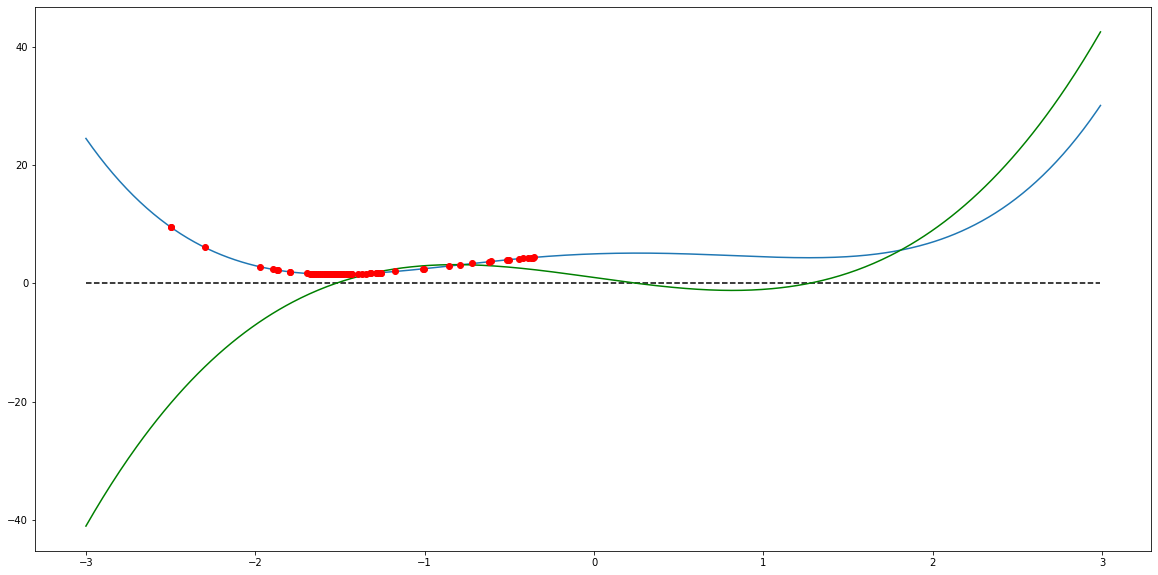

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

x0 = -2.5
r = 0.01
goal = 0.001
mu = 0.9

xs = gradient_descent_momentum(x0, r, goal, mu = mu, gradient_type = 'analythical')
# xs = gradient_descent(x0, r, goal, gradient_type = 'numeric')

ys = f(xs)

x = np.arange(-3.0,3.0,0.01)
y = f(x)
y_prime = f_prime(x)

fig = plt.figure(figsize=(20,10))
plt.plot(x,0 * x,'--k')
plt.plot(x,y)
plt.plot(x,y_prime,'g')
plt.plot(xs,ys,'or')
plt.show()
